## Antmodel

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import init_printing
from sympy import *

### The algorithm

In [106]:
def antmodel(I, T, N, k_in, gamma):
    a = np.array([])
    for i in range(1, I):
        k = k_in
        k_all = []
        k_all.append(k)
        for t in range(1, T):
            epsilon = np.random.uniform(0, 1)
            if ((gamma*(k/N) + (1-gamma)*epsilon)/(gamma*(N/N) + (1-gamma)*1)) > 0.5:
                k = k + 1
                if k > N: k = N
            else:
                k = k - 1
                if k < 0: k = 0
            k_all.append(k)
        if i == 1: a = np.array([k_all])
        else: a = np.append(a, [k_all], axis=0)
    return a

### weak interaction

In [120]:
ants = 100 # sum of all agents
time = 6000 # number of timesteps
ants1 = 50 # sum of agents at food source 1 in t=0
sim = 5 # number of simulations
herding = 0.05 # strength of herding behaviour

timeseries1 = antmodel(sim, time, ants, ants1, herding)

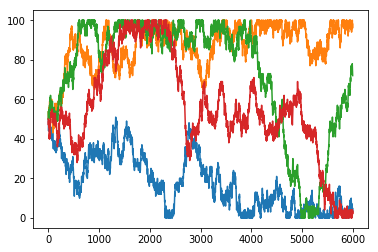

In [121]:
for i in range(1, sim):
    plt.plot(timeseries1[i-1])

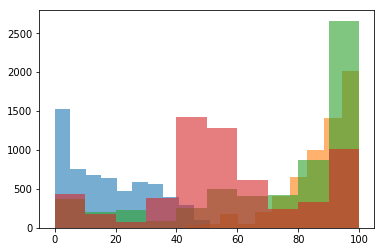

In [122]:
for i in range(1, sim):
    plt.hist(timeseries1[i-1], alpha = 0.6)

### strong interaction

In [117]:
ants = 100 # sum of all agents
time = 300 # number of timesteps
ants1 = 50 # sum of agents at food source 1 in t=0
sim = 5 # number of simulations
herding = 0.5 # strength of herding behaviour

timeseries2 = antmodel(sim, time, ants, ants1, herding)

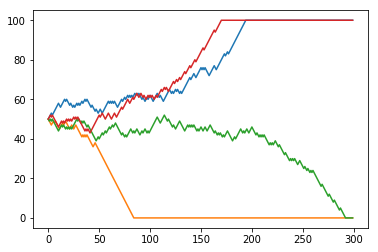

In [118]:
for i in range(1, sim):
    plt.plot(timeseries2[i-1])

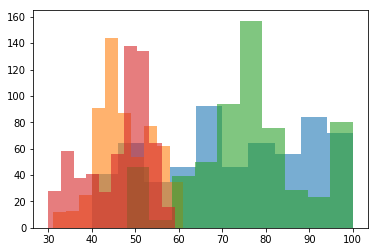

In [119]:
for i in range(1, sim):
    plt.hist(timeseries1[i-1], alpha = 0.6)

### no interaction

In [134]:
ants = 100 # sum of all agents
time = 6000 # number of timesteps
ants1 = 50 # sum of agents at food source 1 in t=0
sim = 5 # number of simulations
herding = 0 # strength of herding behaviour

timeseries3 = antmodel(sim, time, ants, ants1, herding)

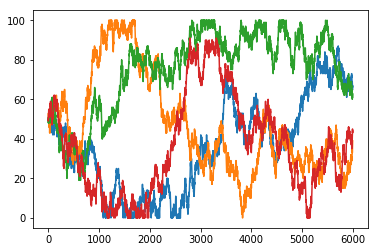

In [135]:
for i in range(1, sim):
    plt.plot(timeseries3[i-1])

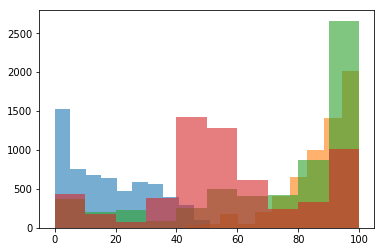

In [138]:
for i in range(1, sim):
    plt.hist(timeseries1[i-1], alpha = 0.6)